In [2]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# -------------------------------
# Custom KMeans implementation
# -------------------------------
class KMeansCustom:
    def __init__(self, K=3, max_iters=100):
        self.K = K
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape

        # randomly initialize centroids
        random_idx = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iters):
            # assign clusters
            labels = self._assign_clusters(X)

            # compute new centroids
            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.K)])

            # check for convergence
            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)



Cluster-to-label mapping: {0: np.int64(2), 1: np.int64(0), 2: np.int64(0)}
Clustering Accuracy: 0.6666666666666666


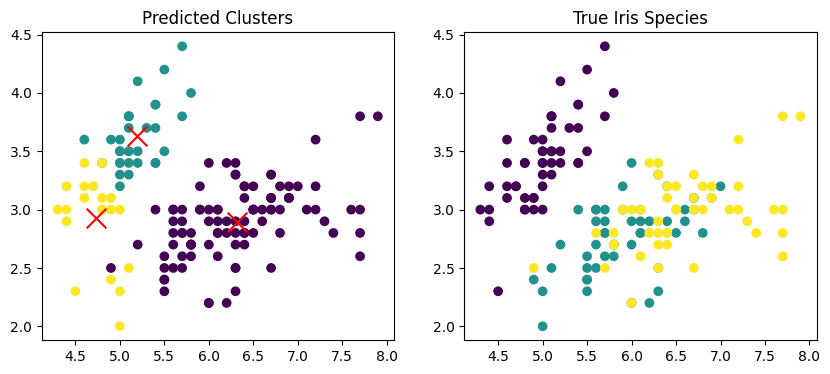

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from scipy.stats import mode
import matplotlib.pyplot as plt


# Step 1: Load Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target  # true labels (0=setosa, 1=versicolor, 2=virginica)

# Step 2: Run clustering
kmeans = KMeansCustom(K=3)
kmeans.fit(X)
y_pred = kmeans.labels_

# Step 3: Align clusters to true labels
labels_map = {}
for cluster in range(3):
    mask = (y_pred == cluster)
    if np.any(mask):
        labels_map[cluster] = mode(y_true[mask], keepdims=True)[0][0]

# remap predicted labels
y_pred_aligned = np.array([labels_map[label] for label in y_pred])

# Step 4: Evaluate accuracy
accuracy = np.mean(y_pred_aligned == y_true)
print("Cluster-to-label mapping:", labels_map)
print("Clustering Accuracy:", accuracy)

# Step 5: Visualization
plt.figure(figsize=(10,4))

# Plot predicted clusters
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="viridis")
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], c="red", marker="x", s=200)
plt.title("Predicted Clusters")

# Plot true labels
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=y_true, cmap="viridis")
plt.title("True Iris Species")

plt.show()